In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import cartopy.feature
import matplotlib.path as mpath
import cmasher as cmr


def axku(ax1):
    ax1.set_extent([-180, 180, -90, -40], ccrs.PlateCarree())
    ax1.add_feature(cartopy.feature.COASTLINE)
    ax1.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='k')
    ax1.gridlines()

    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax1.set_boundary(circle, transform=ax1.transAxes)

In [2]:
meshmask= '../CQWIZ/mesh_mask.nc'
mm= xr.open_dataset(meshmask)

lat_lim=[-80, -40]

# This is needded to integrate NPP
e2t=mm['e2t']
e1t=mm['e1t']
e3t=mm['e3t_0']
e3t1d=mm['e3t_1d']

# Only integrate between 1-100m
e3t1d= e3t1d.where((e3t1d.z<=10) & (e3t1d.z<=27)).compute()
e3t1d= e3t1d.isel(t=0)


In [3]:
epcfile= ['EPC100_mnclim.nc','EPC_antentok.nc','EPC_asmalltok.nc','EPC_feplig.nc']#,'EPC100_mnclim.nc']
ppfile= ['ALLPP_mnclim.nc','ALLPP_antentok.nc','ALLPP_asmalltok.nc', 'ALLPP_feplig.nc']#,'ALLPP_mnclim.nc']
phyfile= ['ALLPHY_mnclim.nc','ALLPHY_antentok.nc','ALLPHY_asmalltok.nc','ALLPHY_feplig.nc']#,'ALLPHY_mnclim.nc']

yrs=['1986-01-01','2101-01-01']

yrsre=['1986-01-01','2005-01-01'] # Reference
yrscc=['2091-01-01','2101-01-01'] # Climate change

fig1=plt.figure(figsize=(20,15))
fig1.patch.set_facecolor('xkcd:white')

grid1 = plt.GridSpec(2, len(epcfile),  wspace=0.1, hspace=0.1)

ppcc=[]
ppref=[]
epiref=[]
epicc=[]
dfraccs=[]
dfrarefs=[]

for e, ep in enumerate(epcfile):
    pp = xr.open_dataset(ppfile[e])
    epc= xr.open_dataset(ep)

    epi=epc['EPC100']
    epiref.append(epi.sel(time_counter=slice(yrsre[0], yrsre[1])).mean('time_counter'))
    epicc.append(epi.sel(time_counter=slice(yrscc[0], yrscc[1])).mean('time_counter'))
    
    # All Primary Production
    ppr= pp['ALLPP']
    ppr= ppr.sel(deptht=slice(4.999938e+00, 1.059699e+02))
    ppccs= ppr.sel(time_counter=slice(yrscc[0], yrscc[1]))
    ppccs= ppccs*e3t1d
    ppccs= ppccs.sel(z=slice(0,10))
    ppccs= ppccs.mean('deptht')
    ppcc1= ppccs.sum(dim=['z']).mean('time_counter')*86400*365*12
    ppcc.append(ppcc1)
    
    ppres= ppr.sel(time_counter=slice(yrsre[0], yrsre[1]))
    ppres= ppres*e3t1d
    ppres= ppres.sel(z=slice(0,10))
    ppres= ppres.mean('deptht')
    ppre1= ppres.sum(dim=['z']).mean('time_counter')*86400*365*12
    ppref.append(ppre1)
    
    # Calculate diatom fraction
    ppd= pp['PPPHYD'].sel(deptht=slice(4.999938e+00, 1.059699e+02))
    dfrac=ppd
    dfracc= dfrac.sel(time_counter=slice(yrscc[0], yrscc[1]))
    dfracc= dfracc*e3t1d
    dfracc= dfracc.sel(z=slice(0,10))
    dfracc= dfracc.mean('deptht')
    dfracc1= dfracc.sum(dim=['z']).mean('time_counter')*86400*365*12
    dfraccs.append(dfracc1)
    
    dfraref= dfrac.sel(time_counter=slice(yrsre[0], yrsre[1]))
    dfraref= dfraref*e3t1d
    dfraref= dfraref.sel(z=slice(0,10))
    dfraref= dfraref.mean('deptht')
    dfraref= dfraref.sum(dim=['z']).mean('time_counter')*86400*365*12
    dfrarefs.append(dfraref)
    
    

<Figure size 1440x1080 with 0 Axes>

In [4]:
# Calculate fraction for other PFTs
phytotypes=['PPPHYD','PPPHYN','PPPHYP']

fraccc=[]
fracref=[]
for p, pp in enumerate(ppfile):
    pps = xr.open_dataset(pp)
#     print(pp)
    
    phycc=[]
    phyref=[]
    for phy in phytotypes:
#         print(phy)
        pphy= pps[phy]
        ppr= pphy.sel(deptht=slice(4.999938e+00, 1.059699e+02))
        
        ppccs= ppr.sel(time_counter=slice(yrscc[0], yrscc[1]))
        ppccs= ppccs*e3t1d
        ppccs= ppccs.sel(z=slice(0,10))
        ppccs= ppccs.mean('deptht')
        ppcc1= ppccs.sum(dim=['z']).mean('time_counter')*86400*365*12
        phycc.append(ppcc1)
    
        ppres= ppr.sel(time_counter=slice(yrsre[0], yrsre[1]))
        ppres= ppres*e3t1d
        ppres= ppres.sel(z=slice(0,10))
        ppres= ppres.mean('deptht')
        ppre1= ppres.sum(dim=['z']).mean('time_counter')*86400*365*12
        phyref.append(ppre1)
    
    fraccc.append(phycc)
    fracref.append(phyref)
        
        
    

PPPHYD
PPPHYN
PPPHYP
PPPHYD
PPPHYN
PPPHYP
PPPHYD
PPPHYN
PPPHYP
PPPHYD
PPPHYN
PPPHYP


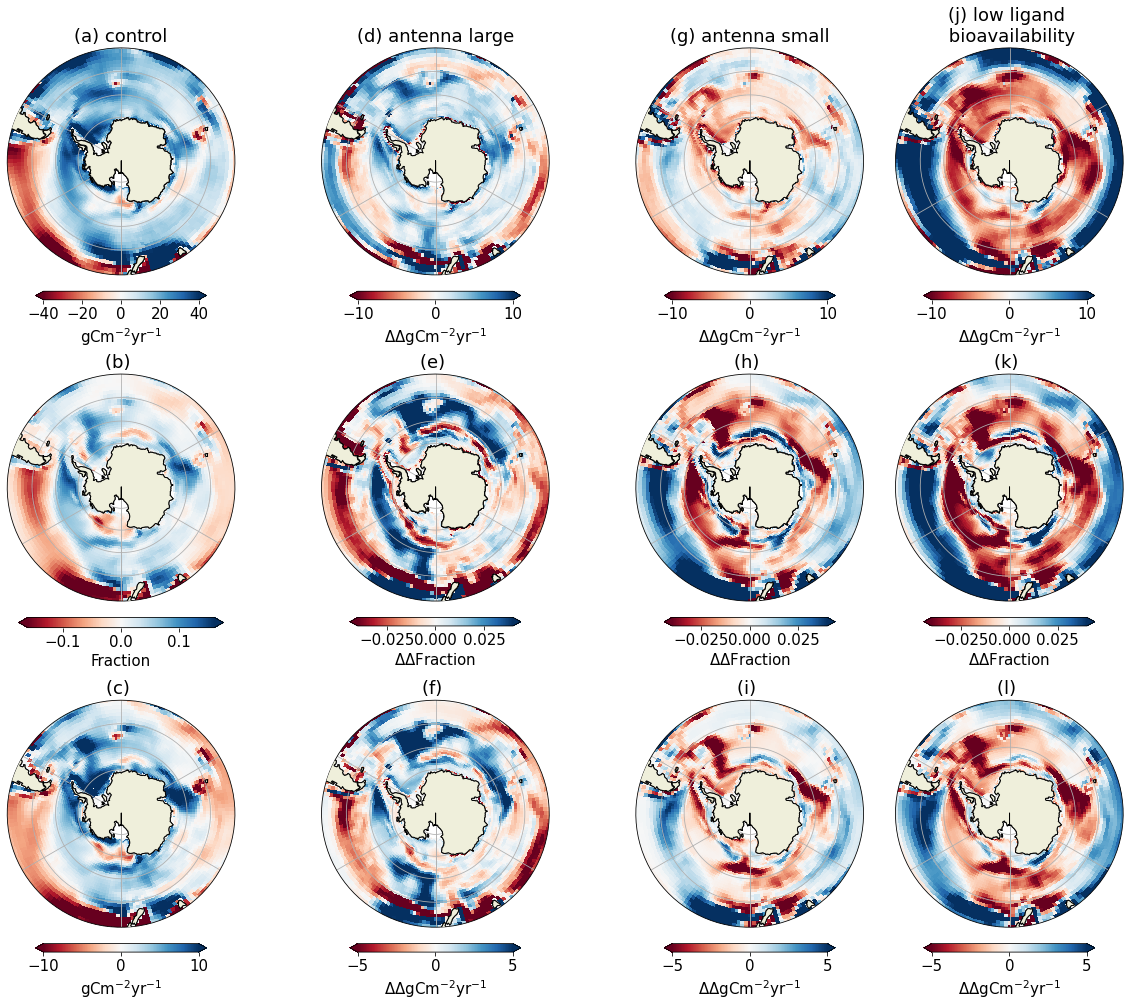

In [7]:
# Plotting the figure
f, ax = plt.subplots(3, 6,figsize=(20,18),sharex=True, 
                     gridspec_kw=dict(width_ratios=[5,0.5,5,0.5,5,5], hspace=0),subplot_kw={'projection':ccrs.SouthPolarStereo()})
plt.rcParams.update({'font.size': 15})

expts= ['control','antenna large','antenna small','low ligand \n bioavailability']
letters=['(a) ','(d) ','(g) ','(j) ']
letter2=['(b) ','(e) ','(h) ','(k) ']
letter3=['(c) ','(f) ','(i) ','(l) ']

dfracdiff=[]
epcdiff=[]
edifperts=[]
for i in range(len(ppcc)):
    diff= (ppcc[i]-ppref[i])
    edif= (epicc[i]-epiref[i])*86400*365*12
    
    fracc=dfraccs[i]/ppcc[i]
    frare=dfrarefs[i]/ppref[i]
    
    ddif= (fracc-frare)
    
    if i == 0:
        diff1= diff.where(diff['nav_lat']<-40).compute()  #TPP
        edif1= edif.where(edif['nav_lat']<-40).compute()  # EPC
        ddif1= ddif.where(ddif['nav_lat']<-40).compute()  # Diatom fraction
        
        p= diff1.plot(y='nav_lat', x='nav_lon', transform=ccrs.PlateCarree(), vmin=-40, vmax=40, cmap='RdBu', ax=ax[0,i],add_labels=False, add_colorbar=False)
        ax[0,i].coastlines()
        ax[0,i].add_feature(cartopy.feature.LAND, zorder=100, edgecolor='k')
        axku(ax[0,i])
        ax[0,i].set_title(letters[i]+'control' )
        cb = plt.colorbar(p, ticks=[-40, -20, 0, 20, 40], ax=ax[0,i], extend='both', shrink=0.75, orientation='horizontal', pad=0.05)
        cb.ax.set_xlabel('gCm$^{-2}$yr$^{-1}$')

        p1= ddif1.plot(y='nav_lat', x='nav_lon', transform=ccrs.PlateCarree(), vmin=-0.16, vmax=0.16, cmap='RdBu', ax=ax[1,i], add_labels=False, add_colorbar=False)
        axku(ax[1,i])
        cbp = plt.colorbar(p1, ax=ax[1,i], extend='both', shrink=0.9, orientation='horizontal', pad=0.05)
        cbp.ax.set_xlabel('Fraction')
        ax[1,i].set_title(letter2[i])
    
        aci3= ax[2,i]
        p1= edif1.plot(y='nav_lat', x='nav_lon', transform=ccrs.PlateCarree(), vmin=-10, vmax=10, cmap='RdBu', ax=aci3, add_labels=False, add_colorbar=False)
        cb2 = plt.colorbar(p1, ax=aci3, extend='both', shrink=0.75, orientation='horizontal', pad=0.05)
        cb2.ax.set_xlabel('gCm$^{-2}$yr$^{-1}$')
        aci3.set_title(letter3[i])
        axku(aci3)
    
    else:
        if i == 1:
            y= i+1
        elif i > 1:
            y = i+2
            
        if i ==1 or i==3:
            ax[1,i].set_axis_off()
            ax[2,i].set_axis_off()
            ax[0,i].set_axis_off()
            
        diff_= diff-diff1
   
        aci2= ax[0,y]
        p= diff_.plot(y='nav_lat', x='nav_lon', transform=ccrs.PlateCarree(), vmin=-10, vmax=10, cmap='RdBu', ax=aci2,add_labels=False, add_colorbar=False)
        cb = plt.colorbar(p, ax=aci2, extend='both', shrink=0.75, orientation='horizontal', pad=0.05)
        aci2.set_title(letters[i] + expts[i])
        cb.ax.set_xlabel('$\Delta\Delta$gCm$^{-2}$yr$^{-1}$')
        axku(aci2)

        
        
        ddif_= ddif-ddif1

        aci4= ax[1,y]
        p1= ddif_.plot(y='nav_lat', x='nav_lon', transform=ccrs.PlateCarree(), vmin=-0.04, vmax=0.04, cmap='RdBu', ax=aci4,add_labels=False, add_colorbar=False)
        cb2 = plt.colorbar(p1,  ax=aci4, extend='both', shrink=0.75, orientation='horizontal', pad=0.05)
        aci4.coastlines()
        aci4.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='k')
        aci4.set_title(letter2[i])
        axku(aci4)
        cb2.ax.set_xlabel('$\Delta\Delta$Fraction')

# #         print(ddif_.mean())


    
        edif_= edif-edif1

        aci3= ax[2,y]
        p1= edif_.plot(y='nav_lat', x='nav_lon', transform=ccrs.PlateCarree(), vmin=-5, vmax=5, cmap='RdBu', ax=aci3,add_labels=False, add_colorbar=False)
        cb3 = plt.colorbar(p1, ticks=[-5, 0, 5], ax=aci3, extend='both', shrink=0.75, orientation='horizontal', pad=0.05)
        aci3.set_title(letter3[i])
        cb3.ax.set_xlabel('$\Delta\Delta$gCm$^{-2}$yr$^{-1}$')
        axku(aci3)
        
        
    


In [8]:
fig1.savefig('ref_ccref_frac.png',dpi=200)

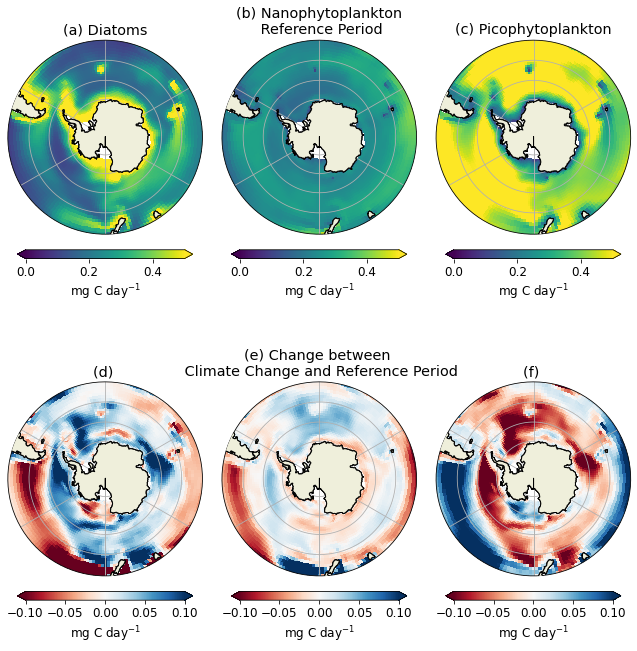

In [11]:
# Plotting phytoplankton fraction
fig1=plt.figure(figsize=(15,12))
fig1.patch.set_facecolor('xkcd:white')
plt.rcParams.update({'font.size': 12})

grid1 = plt.GridSpec(2, len(ppcc),  wspace=0.1, hspace=0.1)
expts= ['control','antenna large','antenna small','lowlig']

phytotypes=['Diatoms','Nanophytoplankton','Picophytoplankton']
lets=['(a) ','(b) ','(c) ']
lets2=['(d) ','(e) ','(f) ']

for i in range(len(expts)):
    pp_cc= ppcc[i]
    phy_cc= fraccc[i]
    
    pp_ref= ppref[i]
    phy_ref= fracref[i]
    
    if i ==0:
        ddif1=[]
    
        for p in range(len(phytotypes)):
            frac_cc=phy_cc[p]/pp_cc
            frac_ref= phy_ref[p]/pp_ref
        
#         if i == 0:
        
            aci2= fig1.add_subplot(grid1[0, p], projection=ccrs.SouthPolarStereo())
            ff=frac_ref.plot(y='nav_lat', x='nav_lon', transform=ccrs.PlateCarree(),ax=aci2, vmin=0, vmax=0.5, add_colorbar=False)
            aci2.coastlines()
            axku(aci2)
            aci2.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='k')
            cb = plt.colorbar(ff, ax=aci2, extend='both', shrink=0.9, orientation='horizontal', pad=0.05)
            cb.ax.set_xlabel('mg C day$^{-1}$')
            aci2.set_title(lets[p]+phytotypes[p])
            if p == 1:
                aci2.set_title(lets[p]+phytotypes[p] +'\n Reference Period')
                

            aci2= fig1.add_subplot(grid1[1, p], projection=ccrs.SouthPolarStereo())
            ff=(frac_cc-frac_ref).plot(y='nav_lat', x='nav_lon', transform=ccrs.PlateCarree(),ax=aci2, cmap='RdBu', vmin=-0.1, vmax=0.1, add_colorbar=False)
            aci2.coastlines()
            axku(aci2)
            aci2.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='k')
            cb = plt.colorbar(ff, ax=aci2, extend='both', shrink=0.9, orientation='horizontal', pad=0.05)
            cb.ax.set_xlabel('mg C day$^{-1}$')
            aci2.set_title(lets2[p])
            if p == 1:
                aci2.set_title(lets2[p]+'Change between \n Climate Change and Reference Period')
        

In [12]:
f.savefig('NPP_EPC.png', dpi=300)    